## Import Libraries

In [156]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import ast

In [157]:
df = pd.read_csv('./ETL/data_product.csv')

df.head()

products  rating   price  \
0     Amazfit Bip 6     4.5   74.99   
1  Amazfit Active 2     4.5   75.99   
2   Amazfit T-Rex 3     4.4  189.99   
3  Amazfit Active 2     4.5   94.99   
4  Amazfit Active 2     4.5   75.99   

                                            features  battery  \
0  Multisport Tracker, Text Messaging, AI Assista...    340.0   
1  Multisport Tracker, Text Messaging, AI Assista...    270.0   
2  Maps, Altitude Assistant, Compass, dual-band G...      0.0   
3  Multisport Tracker, Text Messaging, AI Assista...    270.0   
4  Multisport Tracker, Text Messaging, AI Assista...    270.0   

       connectivity  gps  screen_size  \
0         Bluetooth  1.0         1.97   
1         Bluetooth  1.0         1.32   
2  Bluetooth, Wi-Fi  1.0         1.50   
3         Bluetooth  1.0         1.32   
4         Bluetooth  1.0         1.32   

                                             img_url    brand  
0  https://m.media-amazon.com/images/I/61UvVTN0IE...  Amazfit  
1  https://m.media-amazon.com/images/I/71mpuO4Lqe...  Amazfit  
2  https://m.media-amazon.com/images/I/71GtgMbKvK...  Amazfit  
3  https://m.media-amazon.com/images/I/71XpjL4qkP...  Amazfit  
4  https://m.media-amazon.com/images/I/71XpjL4qkP...  Amazfit

In [158]:
ds = pd.read_csv('review_labelled.csv')

ds.head()

products                                  individual_review  \
0  Amazfit Bip 6  I purchased this watch to replace a dead Samsu...   
1  Amazfit Bip 6  Pleasantly surprised. Finally, a less expensiv...   
2  Amazfit Bip 6  If you’re looking to purchase a smart watch th...   
3  Amazfit Bip 6  This watch does well, considered the price. Th...   
4  Amazfit Bip 6  This watch is amazing quality for the price! I...   

   individual_rating     label  \
0                5.0  Positive   
1                5.0  Positive   
2                5.0  Positive   
3                4.0  Positive   
4                5.0  Positive   

                                               token  \
0  ['purchase', 'watch', 'replace', 'dead', 'sams...   
1  ['pleasantly', 'surprise', 'finally', 'less', ...   
2  ['youre', 'look', 'purchase', 'smart', 'watch'...   
3  ['watch', 'well', 'consider', 'price', 'functi...   
4  ['watch', 'amaze', 'quality', 'price', 'smart'...   

                                          clean_text  
0  purchase watch replace dead samsung galaxy wat...  
1  pleasantly surprise finally less expensive wat...  
2  youre look purchase smart watch affordable bil...  
3  watch well consider price function capability ...  
4  watch amaze quality price smart watch major co...

In [159]:
def brands(products):

    if 'Amazfit' in products:
        return 'Amazfit'
    elif 'Apple' in products:
        return 'Apple Watch'
    elif 'Fitbit' in products:
        return 'Fitbit'
    elif 'Garmin' in products:
        return 'Garmin'
    elif 'Google' in products:
        return 'Google'
    elif 'HUAWEI' in products:
        return 'Huawei'
    elif 'Samsung' in products:
        return 'Samsung'
    elif 'SAMSUNG' in products:
        return 'Samsung'
    elif 'Xiaomi' in products:
        return 'Xiaomi'
    

ds['brand'] = ds['products'].apply(brands)

In [160]:
ds.head()

products                                  individual_review  \
0  Amazfit Bip 6  I purchased this watch to replace a dead Samsu...   
1  Amazfit Bip 6  Pleasantly surprised. Finally, a less expensiv...   
2  Amazfit Bip 6  If you’re looking to purchase a smart watch th...   
3  Amazfit Bip 6  This watch does well, considered the price. Th...   
4  Amazfit Bip 6  This watch is amazing quality for the price! I...   

   individual_rating     label  \
0                5.0  Positive   
1                5.0  Positive   
2                5.0  Positive   
3                4.0  Positive   
4                5.0  Positive   

                                               token  \
0  ['purchase', 'watch', 'replace', 'dead', 'sams...   
1  ['pleasantly', 'surprise', 'finally', 'less', ...   
2  ['youre', 'look', 'purchase', 'smart', 'watch'...   
3  ['watch', 'well', 'consider', 'price', 'functi...   
4  ['watch', 'amaze', 'quality', 'price', 'smart'...   

                                          clean_text    brand  
0  purchase watch replace dead samsung galaxy wat...  Amazfit  
1  pleasantly surprise finally less expensive wat...  Amazfit  
2  youre look purchase smart watch affordable bil...  Amazfit  
3  watch well consider price function capability ...  Amazfit  
4  watch amaze quality price smart watch major co...  Amazfit

In [161]:
ds.to_csv("review.csv", index=False)

## Brand

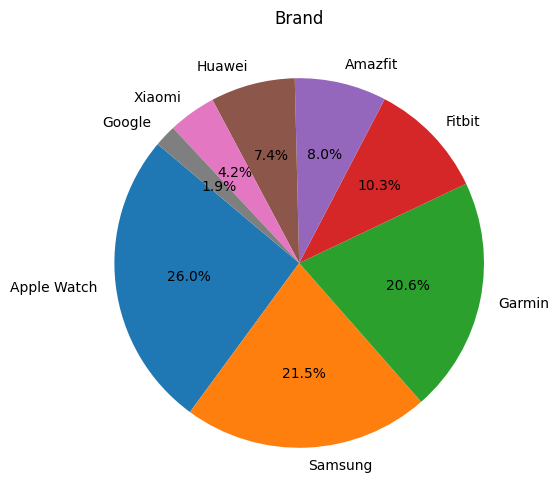

In [162]:
# Pie chart brand yang ada
brand_counts = df['brand'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand')
plt.show()

Brand terbanyak yang dijual yaitu Apple Watch diikuti oleh Samsung dan Garmin.

## Rerata Harga

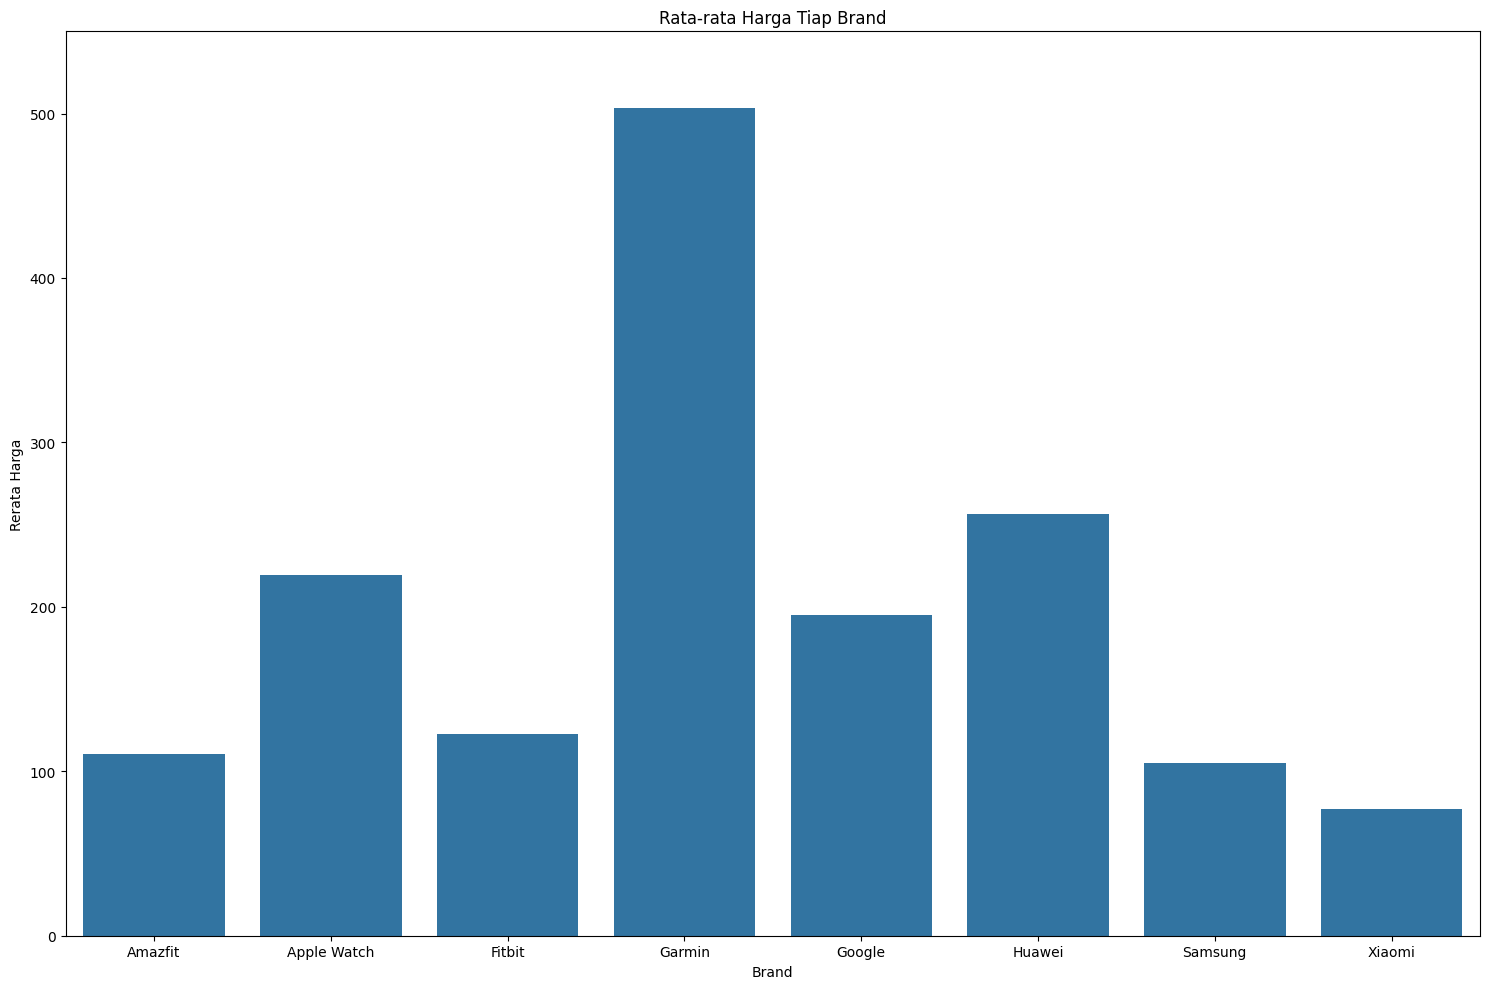

In [163]:
# Vertikal plot untuk rerata harga
rerata_harga = df.groupby('brand')['price'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_harga.index, y=rerata_harga)
plt.title('Rata-rata Harga Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Harga')
plt.ylim(0,550)
plt.tight_layout()
plt.show()

Rata-rata harga Garmin sangat tinggi dibandingkan dengan brand lainnya, ini dikarenakan Garmin merupakan brand luxury. Huawei memiliki rata-rata harga yang cukup tinggi juga meskipun tidak banyak brand Huawei dalam dataset.

## Rerata Rating

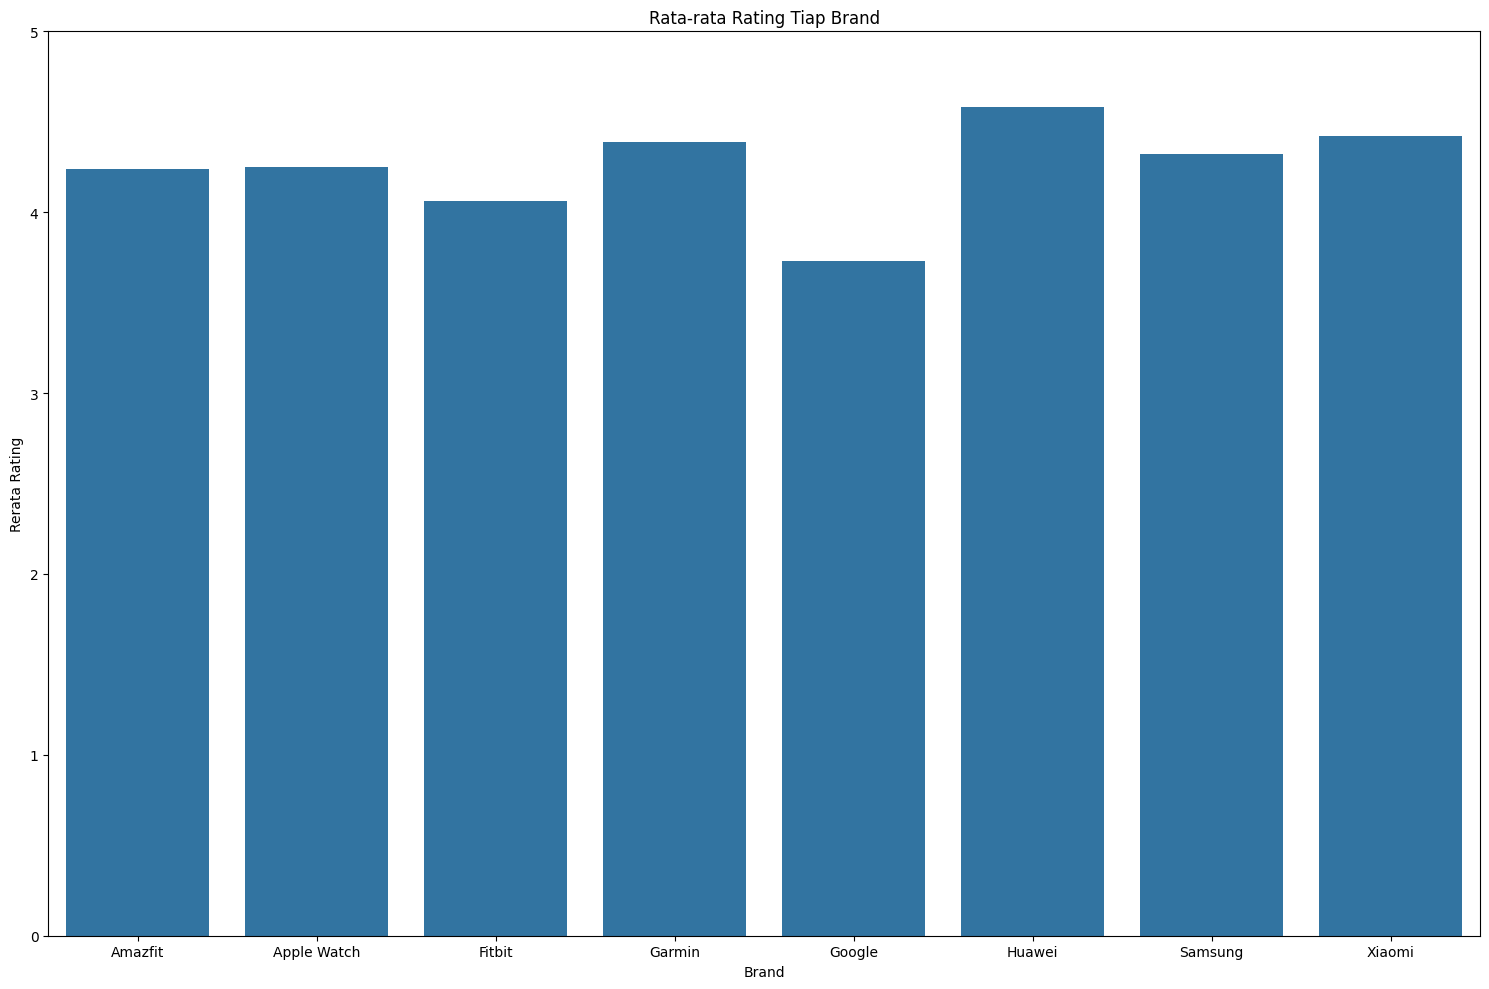

In [164]:
# Vertical plot untuk rating

rerata_rating = df.groupby('brand')['rating'].mean().round(2)

plt.figure(figsize=(15,10))
sns.barplot(x=rerata_rating.index, y=rerata_rating)
plt.title('Rata-rata Rating Tiap Brand')
plt.xlabel('Brand')
plt.ylabel('Rerata Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

Rating tiap brand hampir seimbang, semuanya memiliki rata-rata rating di atas 4 kecuali untuk Google.

## Top 5 Connectivity

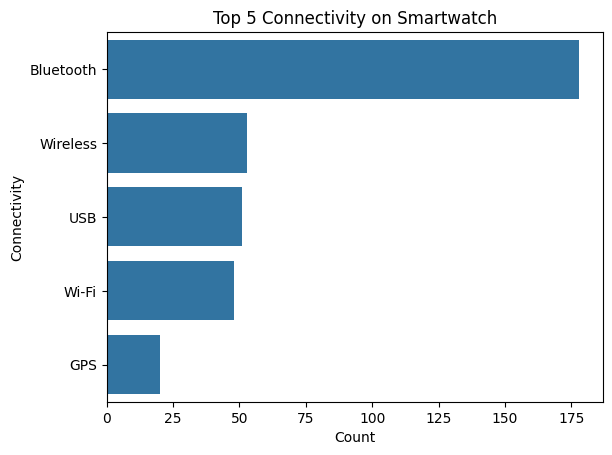

In [165]:
# List konektivitas

all_connectivity = df['connectivity'].dropna().str.split(', ').sum()
connectivity_counts = Counter(all_connectivity)

# Menampilkan 5 konektivitas paling banyak

connectivity_df = pd.DataFrame(connectivity_counts.most_common(5), columns=['Connectivity', 'Count'])

# Horizontal Plot

sns.barplot(data=connectivity_df, x='Count', y='Connectivity')
plt.title('Top 5 Connectivity on Smartwatch')
plt.show()


Banyaknya produk yang memiliki bluetooth ini berarti produk tersebut dapat disambungkan dengan smartphone.

## Price VS Screen Size VS Rating

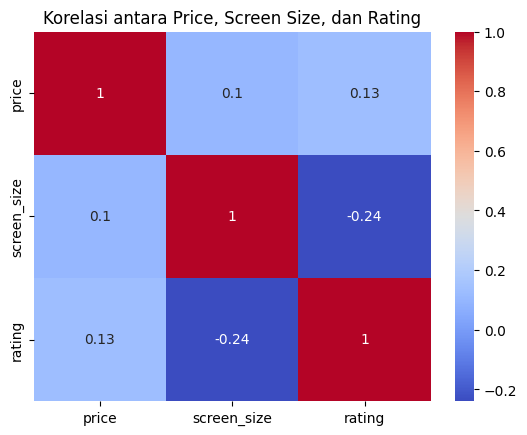

In [166]:
# Heatmap

sns.heatmap(df[['price', 'screen_size', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Price, Screen Size, dan Rating')
plt.show()


Tidak ada korelasi antara screen size dengan rating. Sedangkan price dengan rating dan screen size memiliki korelasi yang lemah.

## Top 10 Features

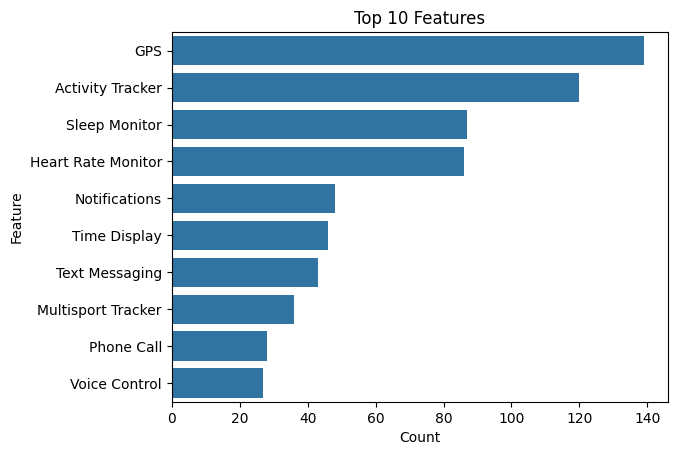

In [167]:
# List fitur

all_features = df['features'].dropna().str.split(', ').sum()
feature_counts = Counter(all_features)

# Menampilkan 10 fitur paling sering muncul

feature_df = pd.DataFrame(feature_counts.most_common(10), columns=['Feature', 'Count'])

# Horizontal Plot

sns.barplot(data=feature_df, x='Count', y='Feature')
plt.title('Top 10 Features')
plt.show()


Fitur paling sering muncul pada smartwatch yaitu GPS dan activity tracker.

## Perbandingan Sentimen

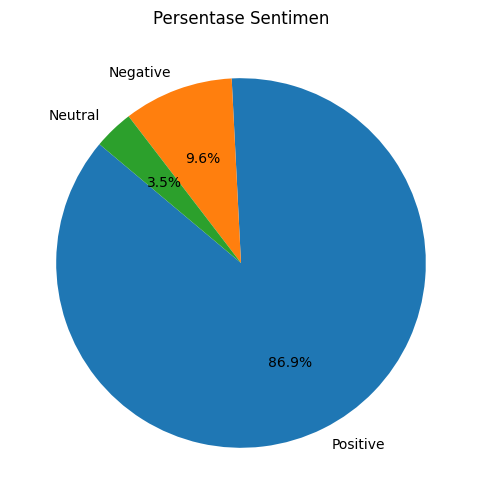

In [168]:
sentimen_counts = ds['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen')
plt.show()

Dari review yang diberikan oleh pembeli, sebagian besar merasa puas, hal ini ditandai oleh tingginya sentimen positif dari pembeli.

In [169]:
# Fungsi untuk membuat Word Cloud 
def generate_wordcloud(data, column_name, title):
    """
    Fungsi untuk membuat Word Cloud dari teks di kolom yang ditentukan.

    Params:
    - data (pd.DataFrame): DataFrame berisi teks yang ingin ditampilkan.
    - column_name (str): Nama kolom dalam DataFrame yang berisi teks yang akan digunakan untuk Word Cloud.
    - title (str): Judul Word Cloud yang ingin ditampilkan.
    """

    # Mengubah string jadi list 
    data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Menggabungkan semua list dalam kolom menjadi satu 
    all_tokens = sum(data[column_name], []) 
    text = ' '.join(all_tokens)

    # Membuat Word Cloud
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        random_state=32,
        min_font_size=10
    ).generate(text)

    # Menampilkan Plot Word Cloud
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=18)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


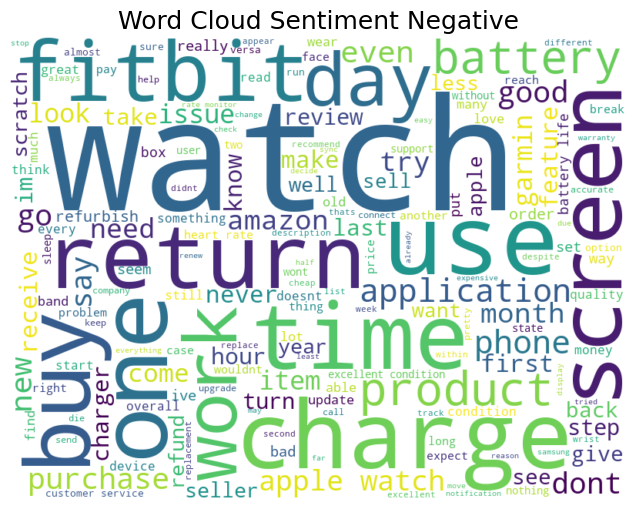

In [170]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[ds['label']=='Negative'], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


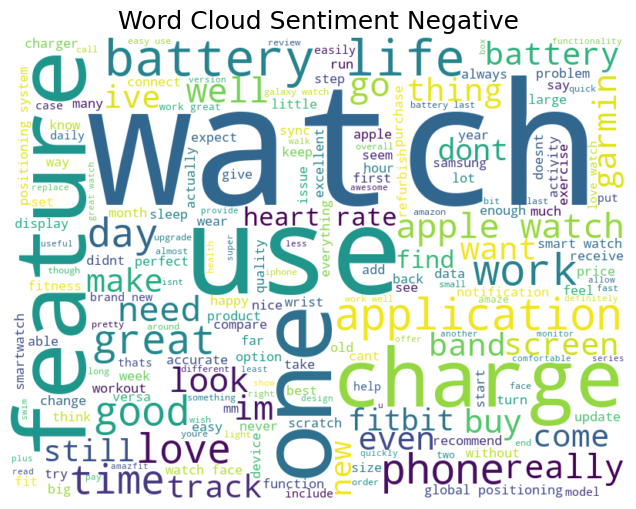

In [171]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[ds['label']=='Positive'], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Amazfit

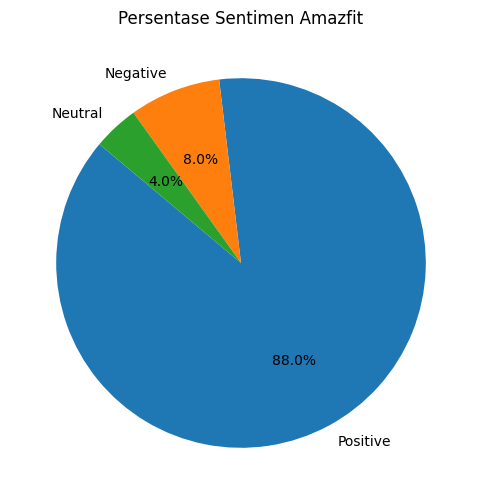

In [172]:
sentimen_counts = ds[ds['products'].str.contains('Amazfit')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Amazfit')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


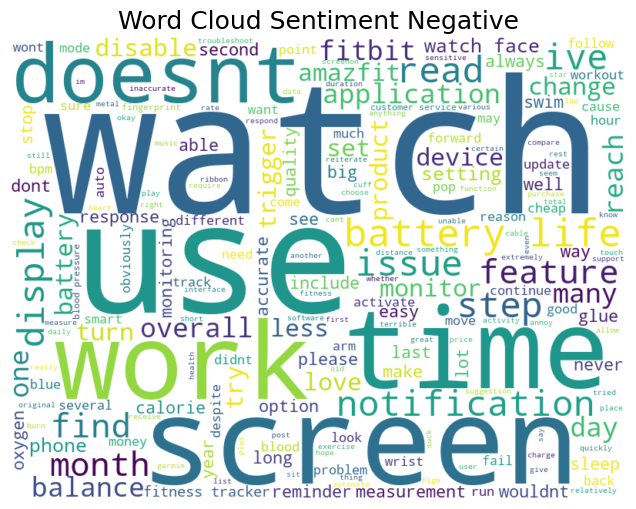

In [173]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Amazfit') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


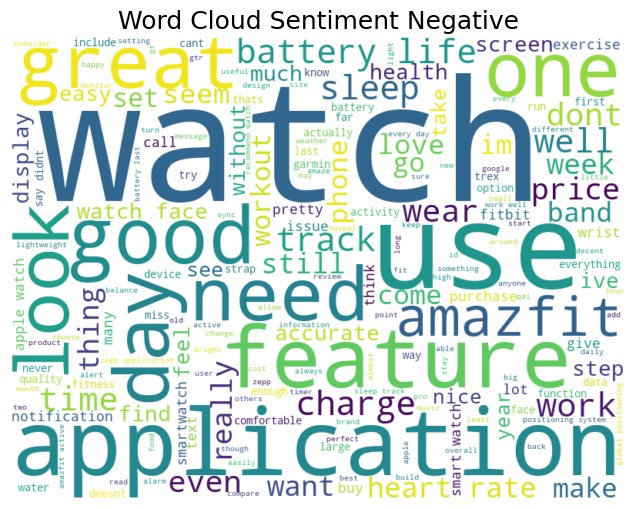

In [174]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Amazfit') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Apple Watch

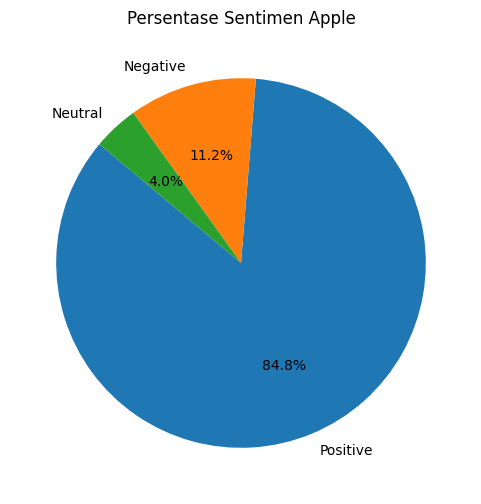

In [175]:
sentimen_counts = ds[ds['products'].str.contains('Apple')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Apple')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


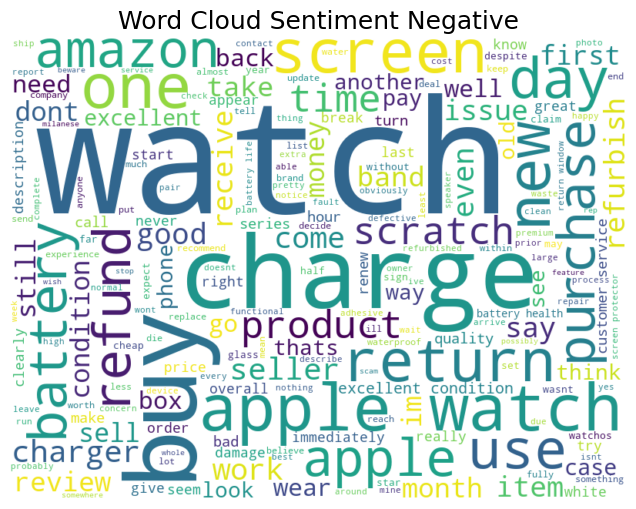

In [176]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Apple Watch') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


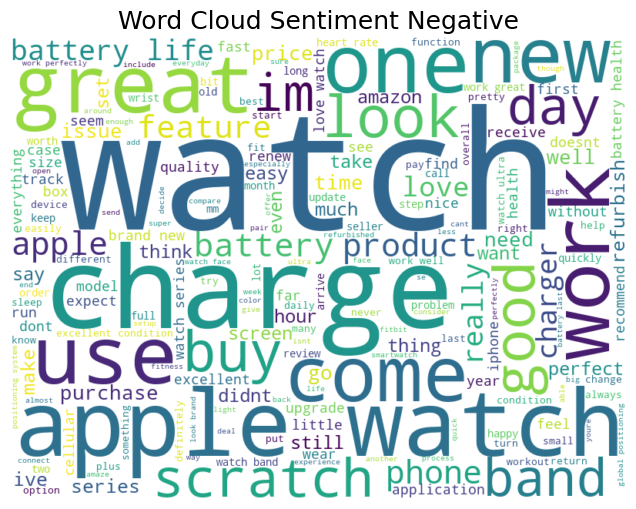

In [177]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Apple Watch') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Fitbit

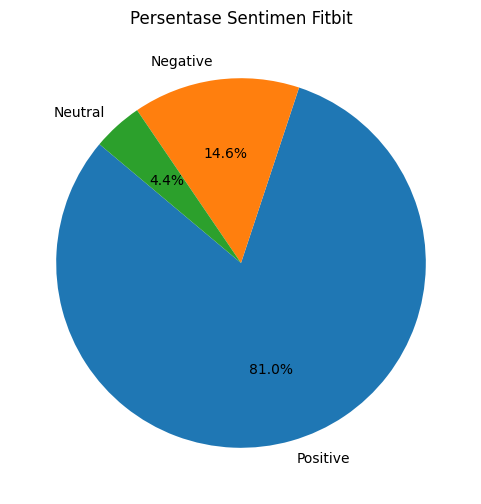

In [178]:
sentimen_counts = ds[ds['products'].str.contains('Fitbit')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Fitbit')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


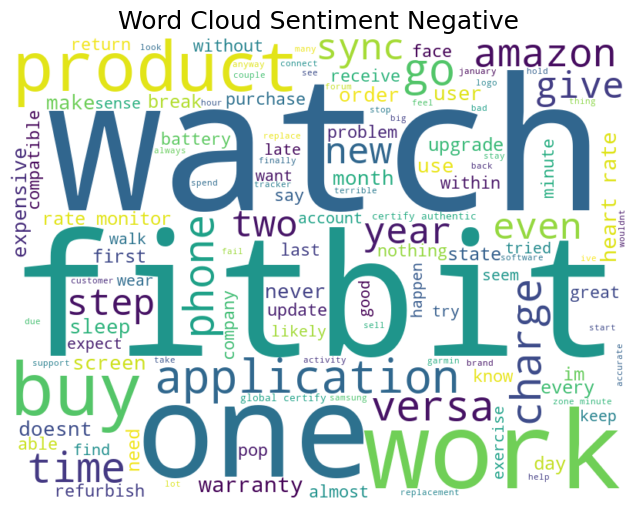

In [179]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Fitbit') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


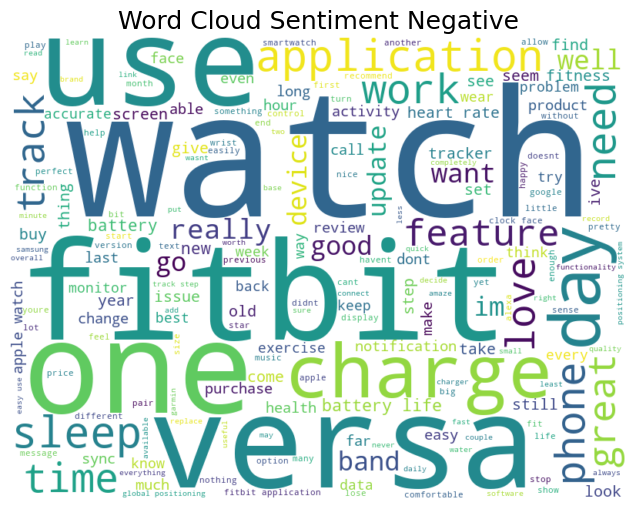

In [180]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Fitbit') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Garmin

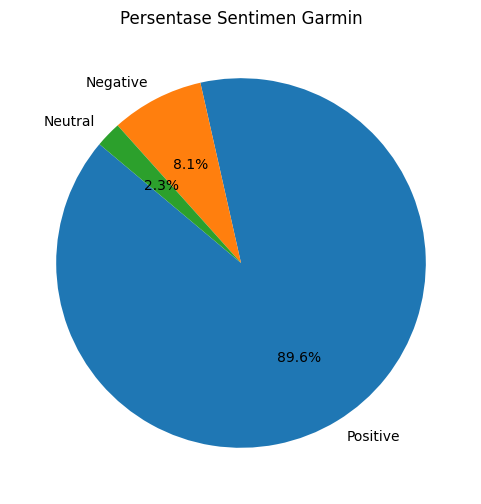

In [181]:
sentimen_counts = ds[ds['products'].str.contains('Garmin')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Garmin')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


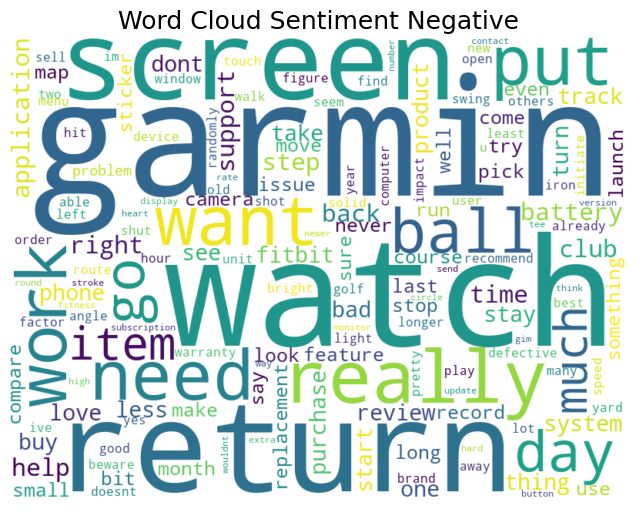

In [182]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Garmin') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


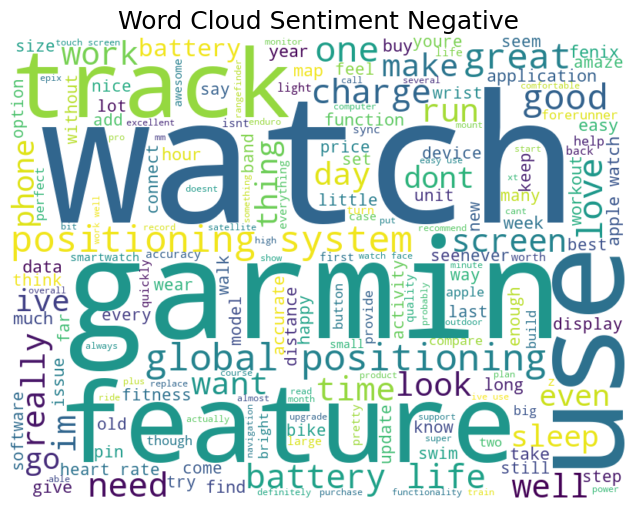

In [183]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Garmin') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Google

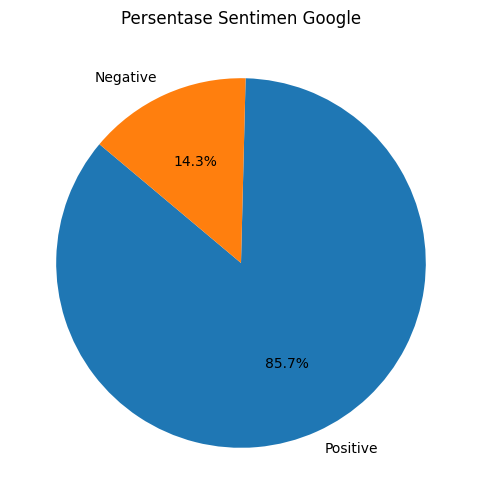

In [184]:
sentimen_counts = ds[ds['products'].str.contains('Google')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Google')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


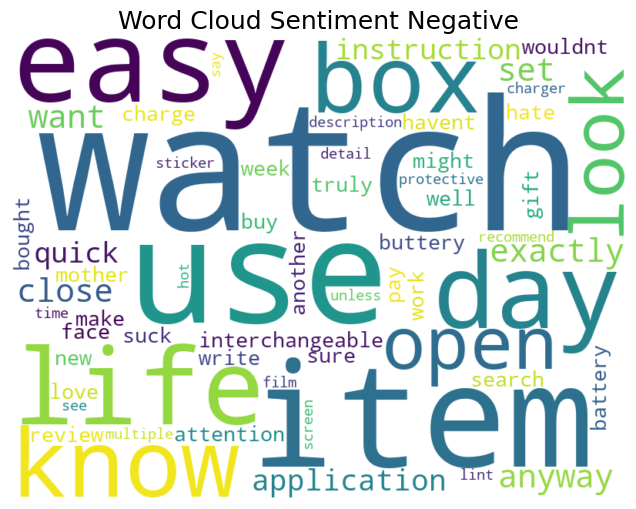

In [185]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Google') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


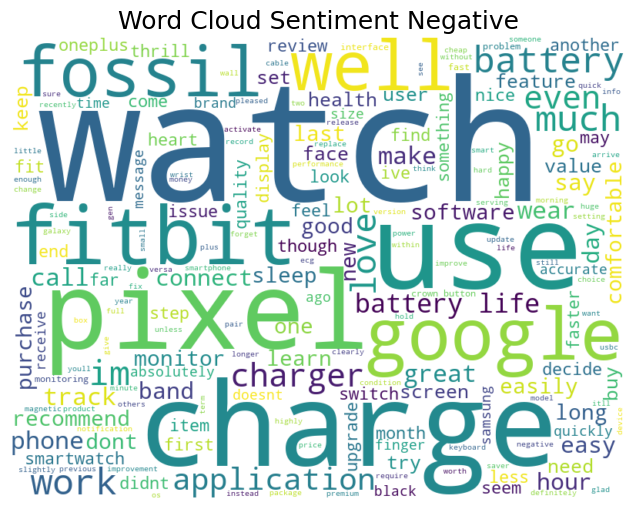

In [186]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Google') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Huawei

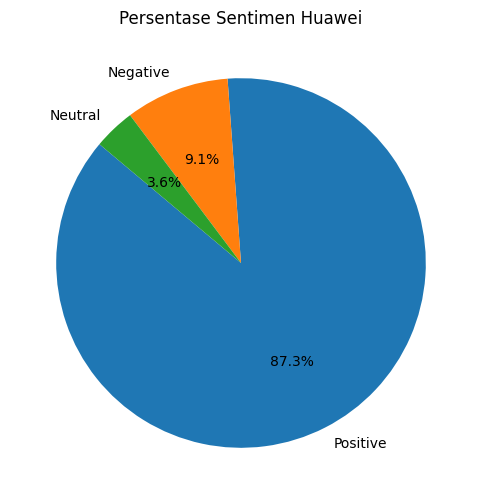

In [187]:
sentimen_counts = ds[ds['products'].str.contains('HUAWEI')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Huawei')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


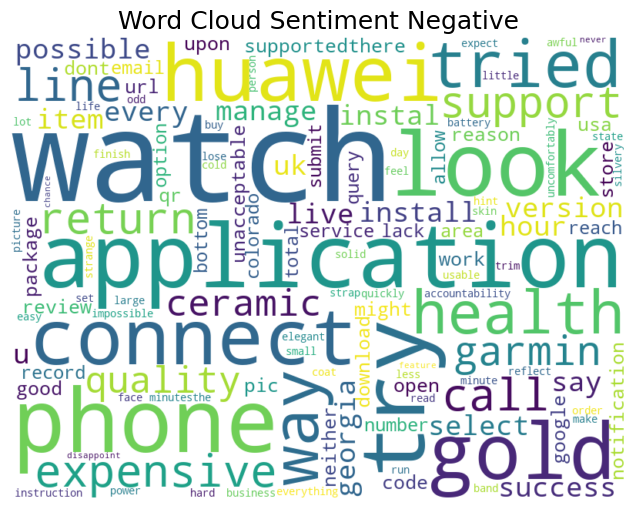

In [188]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Huawei') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


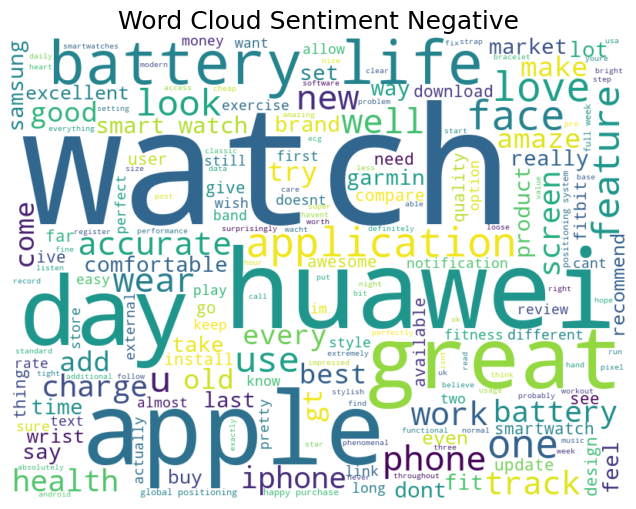

In [189]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Huawei') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Samsung

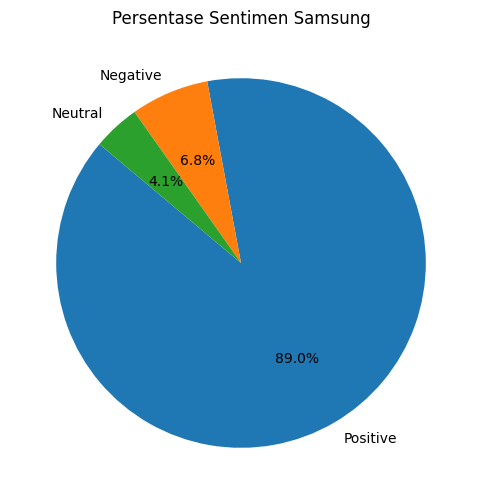

In [190]:
sentimen_counts = ds[ds['products'].str.contains('Samsung')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Samsung')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


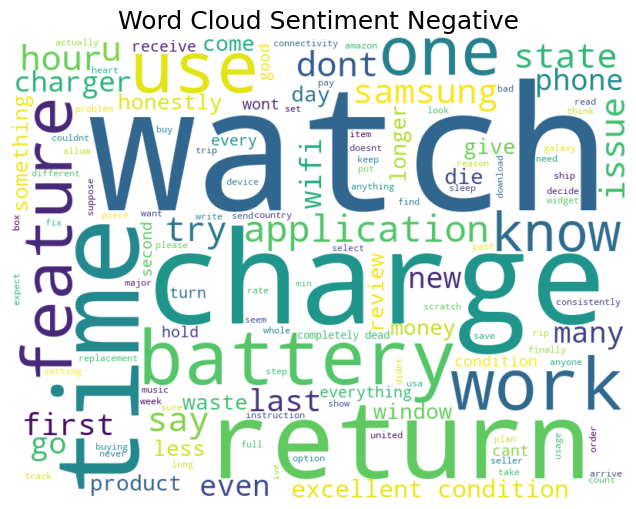

In [191]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Samsung') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


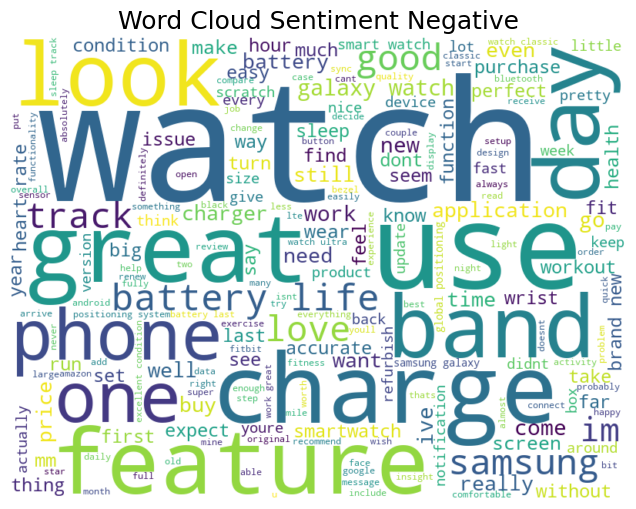

In [192]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Samsung') ], 'token', 'Word Cloud Sentiment Negative')

## Sentimen Brand Xiaomi

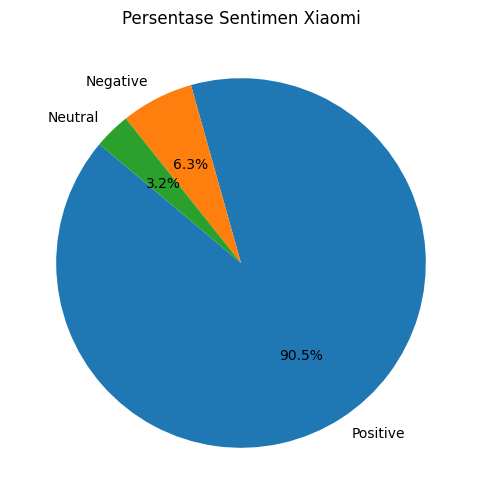

In [193]:
sentimen_counts = ds[ds['products'].str.contains('Xiaomi')]['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Sentimen Xiaomi')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


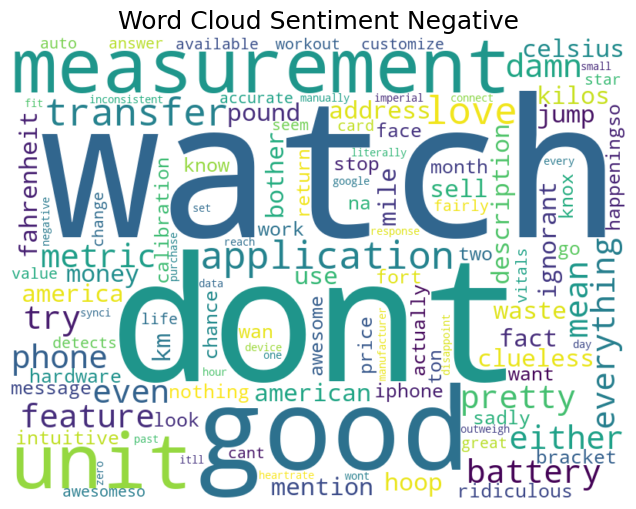

In [194]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Negative') & (ds['brand']=='Xiaomi') ], 'token', 'Word Cloud Sentiment Negative')

C:\Users\user\AppData\Local\Temp\ipykernel_7316\1665951037.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


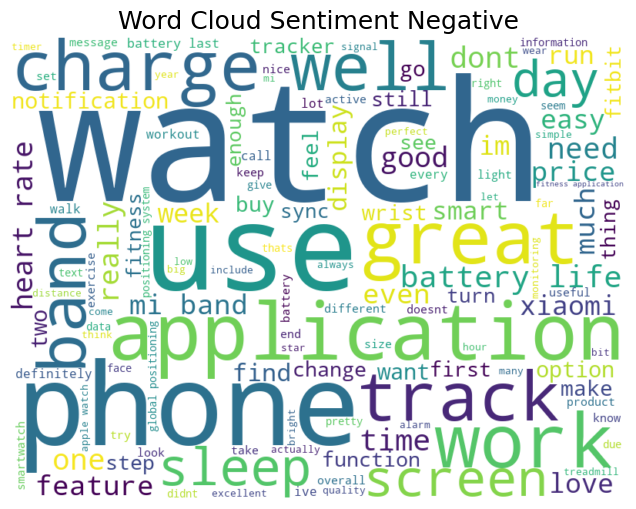

In [195]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(ds[(ds['label']=='Positive') & (ds['brand']=='Xiaomi') ], 'token', 'Word Cloud Sentiment Negative')

## Normalisasi

In [196]:
df.head(1)

products  rating  price  \
0  Amazfit Bip 6     4.5  74.99   

                                            features  battery connectivity  \
0  Multisport Tracker, Text Messaging, AI Assista...    340.0    Bluetooth   

   gps  screen_size                                            img_url  \
0  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   

     brand  
0  Amazfit

In [197]:
# Salin dataframe
df_copy = df.copy()

# Pecah kolom 'features' jadi list
df_copy['features'] = df_copy['features'].str.split(', ')

# Gunakan explode supaya tiap fitur jadi baris
df_exploded = df_copy.explode('features').reset_index(drop=True)

df_exploded.head()

products  rating  price            features  battery connectivity  \
0  Amazfit Bip 6     4.5  74.99  Multisport Tracker    340.0    Bluetooth   
1  Amazfit Bip 6     4.5  74.99      Text Messaging    340.0    Bluetooth   
2  Amazfit Bip 6     4.5  74.99       AI Assistance    340.0    Bluetooth   
3  Amazfit Bip 6     4.5  74.99                 GPS    340.0    Bluetooth   
4  Amazfit Bip 6     4.5  74.99       Notifications    340.0    Bluetooth   

   gps  screen_size                                            img_url  \
0  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
1  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
2  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
3  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
4  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   

     brand  
0  Amazfit  
1  Amazfit  
2  Amazfit  
3  Amazfit  
4  Amazfit

In [198]:
df_exploded['connectivity'] = df_exploded['connectivity'].str.split(', ')

df_exploded = df_exploded.explode('connectivity').reset_index(drop=True)

df_exploded.head()

products  rating  price            features  battery connectivity  \
0  Amazfit Bip 6     4.5  74.99  Multisport Tracker    340.0    Bluetooth   
1  Amazfit Bip 6     4.5  74.99      Text Messaging    340.0    Bluetooth   
2  Amazfit Bip 6     4.5  74.99       AI Assistance    340.0    Bluetooth   
3  Amazfit Bip 6     4.5  74.99                 GPS    340.0    Bluetooth   
4  Amazfit Bip 6     4.5  74.99       Notifications    340.0    Bluetooth   

   gps  screen_size                                            img_url  \
0  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
1  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
2  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
3  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   
4  1.0         1.97  https://m.media-amazon.com/images/I/61UvVTN0IE...   

     brand  
0  Amazfit  
1  Amazfit  
2  Amazfit  
3  Amazfit  
4  Amazfit

In [199]:
df_exploded = df_exploded[['products', 'features', 'connectivity']]

In [200]:
df_exploded.to_csv("normalisasi.csv", index=False)